In [326]:
import pandas as pd
import pickle

In [327]:
df = pickle.load(open('delivery.pkl','rb'))

In [328]:
df.shape

(683858, 10)

##### Bowling team
##### Batting team
##### Current score
##### balls left
##### city
##### wicket left
##### Last 5 over runs
##### Ccr

In [329]:
df.head(3)

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue
0,2,"[Australia, Pakistan]",Australia,0.1,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
1,2,"[Australia, Pakistan]",Australia,0.2,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"
2,2,"[Australia, Pakistan]",Australia,0.3,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba"


In [330]:
def bowl(row):
    for team in row["teams"]:
        if team != row["batting_team"]:
            return team

In [331]:
df["Bowling_team"] = df.apply(bowl,axis=1)

In [332]:
df.sample(5)

,match_id,teams,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,Bowling_team
429316,1502,"[Scotland, Afghanistan]",Afghanistan,18.7,Samiullah Shenwari,JH Davey,1,0,Ayr,Cambusdoon New Ground,Scotland
665895,2319,"[England, Pakistan]",England,46.2,JC Buttler,Mohammad Amir,0,0,Nottingham,Trent Bridge,Pakistan
572935,1997,"[Zimbabwe, India]",Zimbabwe,45.1,SM Ervine,A Kumble,0,0,Hobart,Bellerive Oval,India
97741,346,"[United Arab Emirates, Nepal]",United Arab Emirates,16.3,Rameez Shahzad,Sompal Kami,0,0,Kuala Lumpur,Kinrara Academy Oval,Nepal
141649,500,"[Ireland, Netherlands]",Ireland,4.4,A Balbirnie,FJ Klaassen,1,0,Utrecht,"Sportpark Maarschalkerweerd, Utrecht",Netherlands


In [333]:
df["batting_team"].value_counts()

batting_team
Australia                   75693
Sri Lanka                   74670
India                       66125
Pakistan                    56406
England                     56354
South Africa                51218
New Zealand                 49701
West Indies                 46183
Bangladesh                  44358
Zimbabwe                    40144
Ireland                     18850
Afghanistan                 18814
Scotland                    15325
United Arab Emirates        12751
Papua New Guinea             8399
United States of America     7739
Netherlands                  7316
Namibia                      6202
Nepal                        6038
Oman                         5288
Kenya                        5170
Canada                       4925
Bermuda                      2207
Hong Kong                    1961
Asia XI                       934
Jersey                        607
Africa XI                     480
Name: count, dtype: int64

In [334]:
df.drop(columns=["teams"],inplace=True)

In [335]:
df.head(1)

,match_id,batting_team,ball,batsman,bowler,runs,player_dismissed,city,venue,Bowling_team
0,2,Australia,0.1,DA Warner,Mohammad Amir,0,0,Brisbane,"Brisbane Cricket Ground, Woolloongabba",Pakistan


In [336]:

teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka',
    'Netherlands'
]

In [337]:
df = df[df["batting_team"].isin(teams)]
df = df[df["Bowling_team"].isin(teams)]

In [338]:
df.shape

(385399, 10)

In [339]:
output = df[['match_id','batting_team','Bowling_team','ball','runs','player_dismissed','city']]

In [340]:
output.head()

,match_id,batting_team,Bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Pakistan,0.1,0,0,Brisbane
1,2,Australia,Pakistan,0.2,0,0,Brisbane
2,2,Australia,Pakistan,0.3,0,0,Brisbane
3,2,Australia,Pakistan,0.4,0,0,Brisbane
4,2,Australia,Pakistan,0.5,1,0,Brisbane


In [341]:
output.isnull().sum()

match_id            0
batting_team        0
Bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
dtype: int64

In [342]:
output["city"].value_counts()

city
Colombo               22622
London                20576
Mirpur                18958
Sydney                12325
Centurion             11037
                      ...  
Thiruvananthapuram      305
Jamshedpur              300
Dharmasala              271
Lucknow                 252
Raipur                  212
Name: count, Length: 108, dtype: int64

In [343]:
df = output.copy()

#### Extract cities where minimum 5 matchesa re played 

In [344]:
df['city'].value_counts()[df['city'].value_counts()>3000].value_counts().sum()

41

In [345]:
eligible_cities = df["city"].value_counts()[df["city"].value_counts()>3000].index.tolist()

In [346]:
eligible_cities

['Colombo',
 'London',
 'Mirpur',
 'Sydney',
 'Centurion',
 'Melbourne',
 'Abu Dhabi',
 'Rangiri',
 'Adelaide',
 'Johannesburg',
 'Birmingham',
 'Dubai',
 'Perth',
 'Auckland',
 'Karachi',
 'Lahore',
 'Hamilton',
 'Brisbane',
 'Cardiff',
 'Wellington',
 'Manchester',
 'Pallekele',
 'Cape Town',
 'Durban',
 'Southampton',
 'Sharjah',
 'Nottingham',
 'Chandigarh',
 'Hambantota',
 'Port Elizabeth',
 'Christchurch',
 'Leeds',
 'Napier',
 'Chester-le-Street',
 'Dhaka',
 'Hobart',
 'Mumbai',
 'Bloemfontein',
 'Chattogram',
 'Mount Maunganui',
 'Nagpur']


#### This shows that there are certain cities where very few deliveries have been played. So we can ignore those cities and only consider the ones which have at least 1200 deliveries.


In [347]:
df=df[df['city'].isin(eligible_cities)]

In [348]:
# Convert 'runs' column to numeric (assuming it contains only numeric data)
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')

# Calculate the cumulative sum of 'runs' within each 'match_id' group
df['current_score'] = df.groupby('match_id')['runs'].cumsum()


In [349]:
df

,match_id,batting_team,Bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1
...,...,...,...,...,...,...,...,...
682338,2378,Sri Lanka,Australia,39.5,0,0,Pallekele,194
682339,2378,Sri Lanka,Australia,39.6,0,0,Pallekele,194
682340,2378,Sri Lanka,Australia,39.7,1,0,Pallekele,195
682341,2378,Sri Lanka,Australia,40.1,0,0,Pallekele,195


In [350]:
df['over']=df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no']=df['ball'].apply(lambda x:str(x).split(".")[1])

#### Now by using a simple formula we can create a ‘balls_bowled’ column that is how many balls have been bowled. Formula would be

In [351]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')

In [352]:
df['balls_bowled']=(df['over'].astype('int')*6) + df['ball_no'].astype('int')

In [353]:
df.head(10)

,match_id,batting_team,Bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5
5,2,Australia,Pakistan,0.6,0,0,Brisbane,1,0,6,6
6,2,Australia,Pakistan,0.7,0,0,Brisbane,1,0,7,7
7,2,Australia,Pakistan,1.1,0,0,Brisbane,1,1,1,7
8,2,Australia,Pakistan,1.2,1,0,Brisbane,2,1,2,8
9,2,Australia,Pakistan,1.3,0,0,Brisbane,2,1,3,9


 
#### And now finally we can create our desired column ‘balls_left’ by subtracting balls_bowled from 120 because there are total 120 balls in an innings. sometimes because of extras (wide, no ball …) the ball count exceeds 120 so in such case we can simply give the value of 0.


In [354]:
df['balls_left']=300-df['balls_bowled']
df['balls_left']=df['balls_left'].apply(lambda x:0 if x<0 else x)

In [355]:
df

,match_id,batting_team,Bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295
...,...,...,...,...,...,...,...,...,...,...,...,...
682338,2378,Sri Lanka,Australia,39.5,0,0,Pallekele,194,39,5,239,61
682339,2378,Sri Lanka,Australia,39.6,0,0,Pallekele,194,39,6,240,60
682340,2378,Sri Lanka,Australia,39.7,1,0,Pallekele,195,39,7,241,59
682341,2378,Sri Lanka,Australia,40.1,0,0,Pallekele,195,40,1,241,59



#### Now if we look at the ‘player_dismissed’ column it has either value 0 or name of the player got out at that particular ball. First we will replace all the names with 1 and then apply the cumsum() function on it so we can get the total wickets gone and we will subtract it from 10 to get the ‘wickets_left’ column.


In [356]:
df["player_dismissed"].value_counts().sum()

299014

In [357]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)

In [358]:
df['player_dismissed'].value_counts()

player_dismissed
0    290923
1      8091
Name: count, dtype: int64

In [359]:
df["player_dismissed"].info()

<class 'pandas.core.series.Series'>
Index: 299014 entries, 0 to 682342
Series name: player_dismissed
Non-Null Count   Dtype
--------------   -----
299014 non-null  int64
dtypes: int64(1)
memory usage: 4.6 MB


In [360]:
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()
df['wickets_left'] = 10 - df['player_dismissed']


In [361]:
df

,match_id,batting_team,Bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299,10
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298,10
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297,10
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296,10
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
682338,2378,Sri Lanka,Australia,39.5,0,9,Pallekele,194,39,5,239,61,1
682339,2378,Sri Lanka,Australia,39.6,0,9,Pallekele,194,39,6,240,60,1
682340,2378,Sri Lanka,Australia,39.7,1,9,Pallekele,195,39,7,241,59,1
682341,2378,Sri Lanka,Australia,40.1,0,9,Pallekele,195,40,1,241,59,1


In [362]:
df["crr"]= df["current_score"]*6/df["balls_bowled"]

In [363]:
df.head(5)

,match_id,batting_team,Bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299,10,0.0
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298,10,0.0
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297,10,0.0
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296,10,0.0
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295,10,1.2


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299014 entries, 0 to 682342
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          299014 non-null  int64  
 1   batting_team      299014 non-null  object 
 2   Bowling_team      299014 non-null  object 
 3   ball              299014 non-null  float64
 4   runs              299014 non-null  int64  
 5   player_dismissed  299014 non-null  int32  
 6   city              299014 non-null  object 
 7   current_score     299014 non-null  int64  
 8   over              299014 non-null  object 
 9   ball_no           299014 non-null  object 
 10  balls_bowled      299014 non-null  int32  
 11  balls_left        299014 non-null  int64  
 12  wickets_left      299014 non-null  int32  
 13  crr               299014 non-null  float64
dtypes: float64(2), int32(3), int64(4), object(5)
memory usage: 30.8+ MB


### Last 5 over

In [365]:

groups=df.groupby('match_id')

match_ids=df['match_id'].unique()
last_five=[]
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30)['runs'].sum().values.tolist())

In [366]:
df['last_five']=last_five

In [367]:
df

,match_id,batting_team,Bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299,10,0.000000,NaN
1,2,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298,10,0.000000,NaN
2,2,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297,10,0.000000,NaN
3,2,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296,10,0.000000,NaN
4,2,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295,10,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682338,2378,Sri Lanka,Australia,39.5,0,9,Pallekele,194,39,5,239,61,1,4.870293,24.0
682339,2378,Sri Lanka,Australia,39.6,0,9,Pallekele,194,39,6,240,60,1,4.850000,23.0
682340,2378,Sri Lanka,Australia,39.7,1,9,Pallekele,195,39,7,241,59,1,4.854772,24.0
682341,2378,Sri Lanka,Australia,40.1,0,9,Pallekele,195,40,1,241,59,1,4.854772,23.0


In [368]:
final_df=df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [369]:
final_df

,match_id,runs_x,batting_team,Bowling_team,ball,runs_y,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,268,Australia,Pakistan,0.1,0,0,Brisbane,0,0,1,1,299,10,0.000000,NaN
1,2,268,Australia,Pakistan,0.2,0,0,Brisbane,0,0,2,2,298,10,0.000000,NaN
2,2,268,Australia,Pakistan,0.3,0,0,Brisbane,0,0,3,3,297,10,0.000000,NaN
3,2,268,Australia,Pakistan,0.4,0,0,Brisbane,0,0,4,4,296,10,0.000000,NaN
4,2,268,Australia,Pakistan,0.5,1,0,Brisbane,1,0,5,5,295,10,1.200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299009,2378,195,Sri Lanka,Australia,39.5,0,9,Pallekele,194,39,5,239,61,1,4.870293,24.0
299010,2378,195,Sri Lanka,Australia,39.6,0,9,Pallekele,194,39,6,240,60,1,4.850000,23.0
299011,2378,195,Sri Lanka,Australia,39.7,1,9,Pallekele,195,39,7,241,59,1,4.854772,24.0
299012,2378,195,Sri Lanka,Australia,40.1,0,9,Pallekele,195,40,1,241,59,1,4.854772,23.0


### final columns 

In [370]:
final_df = final_df[['batting_team','Bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [371]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299014 entries, 0 to 299013
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   batting_team   299014 non-null  object 
 1   Bowling_team   299014 non-null  object 
 2   city           299014 non-null  object 
 3   current_score  299014 non-null  int64  
 4   balls_left     299014 non-null  int64  
 5   wickets_left   299014 non-null  int32  
 6   crr            299014 non-null  float64
 7   last_five      269133 non-null  float64
 8   runs_x         299014 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 19.4+ MB


In [372]:
selected_columns = ['current_score', 'wickets_left', 'crr', 'last_five', 'balls_left']

# Calculate the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

               current_score  wickets_left       crr  last_five  balls_left
current_score       1.000000     -0.614972  0.418216   0.536572   -0.937395
wickets_left       -0.614972      1.000000  0.041975   0.008012    0.760785
crr                 0.418216      0.041975  1.000000   0.649055   -0.206296
last_five           0.536572      0.008012  0.649055   1.000000   -0.337257
balls_left         -0.937395      0.760785 -0.206296  -0.337257    1.000000


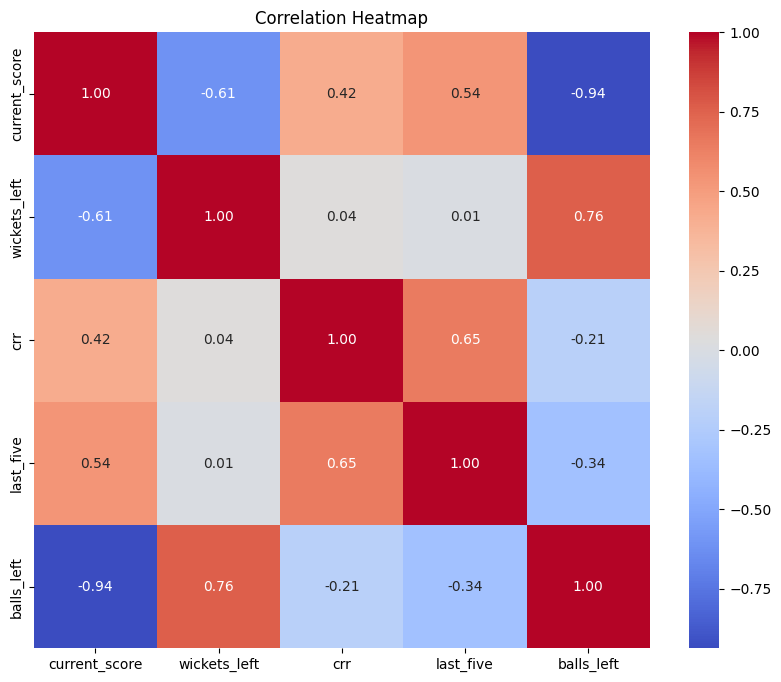

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the selected columns' correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Customize plot labels
plt.title("Correlation Heatmap")
plt.show()


In [374]:
final_df

,batting_team,Bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,Australia,Pakistan,Brisbane,0,299,10,0.000000,NaN,268
1,Australia,Pakistan,Brisbane,0,298,10,0.000000,NaN,268
2,Australia,Pakistan,Brisbane,0,297,10,0.000000,NaN,268
3,Australia,Pakistan,Brisbane,0,296,10,0.000000,NaN,268
4,Australia,Pakistan,Brisbane,1,295,10,1.200000,NaN,268
...,...,...,...,...,...,...,...,...,...
299009,Sri Lanka,Australia,Pallekele,194,61,1,4.870293,24.0,195
299010,Sri Lanka,Australia,Pallekele,194,60,1,4.850000,23.0,195
299011,Sri Lanka,Australia,Pallekele,195,59,1,4.854772,24.0,195
299012,Sri Lanka,Australia,Pallekele,195,59,1,4.854772,23.0,195


 
#### Now we will drop all the columns which we dont want to have for our model and keep those which we created just now. Also we will shuffle the data to avoid any kind of bias.


In [375]:
final_df.isnull().sum()

batting_team         0
Bowling_team         0
city                 0
current_score        0
balls_left           0
wickets_left         0
crr                  0
last_five        29881
runs_x               0
dtype: int64

In [376]:
final_df.dropna(inplace=True)

C:\Users\SAMAR\AppData\Local\Temp\ipykernel_23304\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [377]:
final_df.isnull().sum()

batting_team     0
Bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

#### for avoid bais we did a suffleing 

In [378]:
final_df=final_df.sample(final_df.shape[0])

In [379]:
final_df

,batting_team,Bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
30085,Sri Lanka,South Africa,Cape Town,178,38,3,4.076336,24.0,225
158060,New Zealand,Australia,Wellington,136,129,6,4.771930,26.0,241
77177,Bangladesh,England,Chattogram,109,160,8,4.671429,30.0,246
99125,South Africa,Australia,Cape Town,139,124,7,4.738636,33.0,289
65177,Bangladesh,South Africa,Centurion,292,9,3,6.020619,31.0,314
...,...,...,...,...,...,...,...,...,...
203467,Afghanistan,Pakistan,Sharjah,191,22,3,4.122302,25.0,195
209090,South Africa,Pakistan,Bloemfontein,54,234,10,4.909091,35.0,315
109134,South Africa,Pakistan,Centurion,229,82,7,6.302752,25.0,392
244856,India,Australia,Brisbane,160,114,8,5.161290,23.0,303


In [380]:
# Assuming 'df' is your DataFrame containing the data
# You can exclude non-numeric columns like this:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)


                  match_id      ball      runs  player_dismissed  \
match_id          1.000000 -0.005349 -0.009635         -0.006626   
ball             -0.005349  1.000000  0.118392          0.760737   
runs             -0.009635  0.118392  1.000000          0.021731   
player_dismissed -0.006626  0.760737  0.021731          1.000000   
current_score    -0.031298  0.937339  0.164190          0.614972   
balls_bowled     -0.005342  0.999965  0.118338          0.760787   
balls_left        0.005343 -0.999965 -0.118334         -0.760785   
wickets_left      0.006626 -0.760737 -0.021731         -1.000000   
crr              -0.063450  0.206248  0.202704         -0.041975   
last_five        -0.037747  0.337118  0.279310         -0.008012   

                  current_score  balls_bowled  balls_left  wickets_left  \
match_id              -0.031298     -0.005342    0.005343      0.006626   
ball                   0.937339      0.999965   -0.999965     -0.760737   
runs                   0.1

#### So lets now begin with model building process. For that first we will divide our dataset in training set and testing set using train_test_split module of sklearn library

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [382]:
X=final_df.drop(columns=['runs_x'])
y=final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [383]:
X_train

,batting_team,Bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
106258,England,New Zealand,Brisbane,83,190,7,4.527273,31.0
151733,Pakistan,Australia,Perth,63,168,7,2.863636,23.0
196599,Sri Lanka,Pakistan,Abu Dhabi,84,184,6,4.344828,16.0
11161,Bangladesh,Afghanistan,Mirpur,131,124,6,4.465909,20.0
108812,Australia,New Zealand,Chandigarh,159,88,6,4.500000,34.0
...,...,...,...,...,...,...,...,...
163445,India,Sri Lanka,Nagpur,151,120,6,5.033333,26.0
190828,Sri Lanka,India,Adelaide,236,0,1,4.720000,37.0
296833,Sri Lanka,South Africa,Johannesburg,106,162,7,4.608696,18.0
6663,India,Sri Lanka,London,138,152,10,5.594595,32.0


In [384]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','Bowling_team','city'])
],remainder='passthrough')

In [385]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [386]:
pipe.fit(X_train,y_train)

c:\Users\SAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'Bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rou...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=1000,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=1, ...))])

In [387]:
Y_pred=pipe.predict(X_test)

In [397]:
print(r2_score(y_test,Y_pred))
print(mean_absolute_error(y_test,Y_pred))


0.9868847692264552
3.0050658558869916


In [389]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [390]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Load your dataset and preprocess it as described previously
# X_encoded = pd.get_dummies(X, columns=['batting_team', 'Bowling_team', 'city'], drop_first=True)
# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# # Initialize and train various regression models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor(),
#     "Gradient Boosting": GradientBoostingRegressor(),
  
# }

# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     print(f"Model: {model_name}")
#     print(f"Root Mean Squared Error (RMSE): {rmse}")
#     print(f"Mean Absolute Error (MAE): {mae}")
#     print(f"R-squared (R2) Score: {r2}")
#     print("-" * 30)


In [391]:
teams

['Australia',
 'India',
 'Bangladesh',
 'New Zealand',
 'South Africa',
 'England',
 'Afghanistan',
 'Pakistan',
 'Sri Lanka',
 'Netherlands']

In [392]:
eligible_cities

['Colombo',
 'London',
 'Mirpur',
 'Sydney',
 'Centurion',
 'Melbourne',
 'Abu Dhabi',
 'Rangiri',
 'Adelaide',
 'Johannesburg',
 'Birmingham',
 'Dubai',
 'Perth',
 'Auckland',
 'Karachi',
 'Lahore',
 'Hamilton',
 'Brisbane',
 'Cardiff',
 'Wellington',
 'Manchester',
 'Pallekele',
 'Cape Town',
 'Durban',
 'Southampton',
 'Sharjah',
 'Nottingham',
 'Chandigarh',
 'Hambantota',
 'Port Elizabeth',
 'Christchurch',
 'Leeds',
 'Napier',
 'Chester-le-Street',
 'Dhaka',
 'Hobart',
 'Mumbai',
 'Bloemfontein',
 'Chattogram',
 'Mount Maunganui',
 'Nagpur']